In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format='{:.2f}'.format
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [579]:


def wrangle(filename, encoding=None, date_column=None, dropna_nan_columns=[],dropna_nan_columns0=False, drop_duplicates_columns=None, change_column_name={} ):
    global df
    df = pd.read_csv(filename, encoding=encoding)  #0. Load the dataset

    #1. Clean column names: remove spaces and convert to lowercase
    df.columns = df.columns.str.strip().str.lower()

    #2. convert space to _
    df.columns=df.columns.str.replace(' ','_')


    #3- Convert the specified column to datetime if provided
    if date_column:
        df[date_column] = pd.to_datetime(df[date_column]) 

    #4- Drop all columns that contain only NaN values    
    if dropna_nan_columns0:
        df=df.dropna(axis=1 , how='all')    
    
    #5- Drop rows with NaN values in the specified columns
    if dropna_nan_columns:
        df.dropna(subset=dropna_nan_columns, inplace=True)

    #6- Remove duplicate rows based on specified columns
    if drop_duplicates_columns:
        df.drop_duplicates(subset=drop_duplicates_columns, inplace=True)

    
    #7- Rename columns if a mapping is provided
    if change_column_name:
        df.rename(columns=change_column_name, inplace=True)
    


    return df


In [580]:
df=wrangle('marriage_divorce_india_with_id.csv')
df.sample(10)

,unique_id,marriage_duration_(years),age_at_marriage,marriage_type,education_level,income_level_(inr_per_month),caste/religion,urban/rural,family_involvement,children,divorce_status
530,MD531,4,18,Love,Primary,150830,Other,Rural,High,3,No
559,MD560,21,28,Arranged,Postgraduate,51250,Hindu,Urban,Low,1,No
1129,MD1130,34,19,Love,No Education,110973,Other,Rural,Low,3,No
375,MD376,5,19,Arranged,Graduate,132581,Muslim,Urban,Low,4,Yes
6,MD7,19,29,Arranged,Secondary,96198,Christian,Rural,Moderate,0,No
394,MD395,21,27,Arranged,Primary,183296,Muslim,Rural,Low,4,No
840,MD841,3,20,Love,Postgraduate,38040,Other,Rural,Low,3,No
606,MD607,25,27,Arranged,Graduate,50256,Muslim,Rural,Moderate,4,No
943,MD944,27,29,Arranged,No Education,72616,Hindu,Urban,Moderate,4,Yes
197,MD198,16,19,Love,Postgraduate,122509,Jain,Rural,Low,1,No


In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   unique_id                     1200 non-null   object
 1   marriage_duration_(years)     1200 non-null   int64 
 2   age_at_marriage               1200 non-null   int64 
 3   marriage_type                 1200 non-null   object
 4   education_level               1200 non-null   object
 5   income_level_(inr_per_month)  1200 non-null   int64 
 6   caste/religion                1200 non-null   object
 7   urban/rural                   1200 non-null   object
 8   family_involvement            1200 non-null   object
 9   children                      1200 non-null   int64 
 10  divorce_status                1200 non-null   object
dtypes: int64(4), object(7)
memory usage: 103.3+ KB



<span style="color: orange; font-size: 30px;">1- percentage of divorces in india ✅</span>


In [582]:
percentage=(df['divorce_status'][df['divorce_status']=='Yes'].count() / len(df['divorce_status'])) * 100
print(f'{percentage:.2f} %')



31.17 %


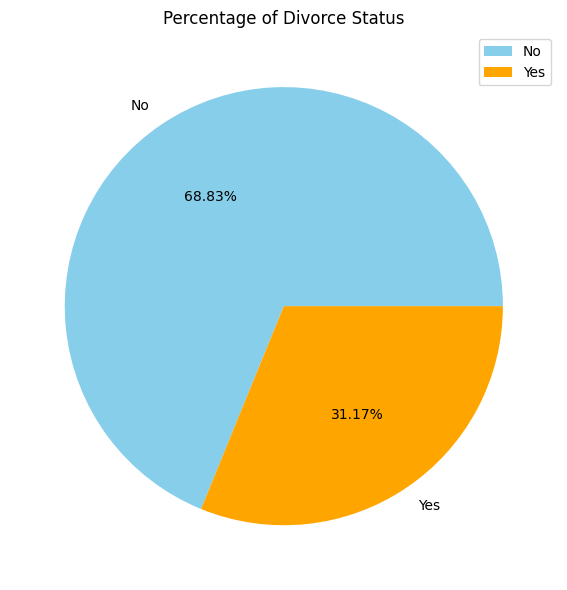

In [583]:
# Calculate the distribution of 'divorce_status'
divorce_counts = df['divorce_status'].value_counts()

# Plot the pie chart
divorce_counts.plot(
    kind='pie',
    autopct='%1.2f%%',  
    colors=['skyblue', 'orange'],  
    legend=True,  
    figsize=(8, 6) 
)
plt.title('Percentage of Divorce Status')  
plt.ylabel('')  
plt.tight_layout()  
plt.show()

<span style="color: skyblue; font-size: 20px;">observed that the divorce rate in India is notably high at 31.17%. In the following sections, we will analyze the relationship between divorce and other contributing factors.</span>
<div style="background: linear-gradient(to right,rgb(3, 12, 14),rgb(227, 55, 106)); height: 5px; border: none;"></div>


# <span style="color: orange; font-size: 30px;">The relationship between the age at marriage and divorce ✅</span>


In [584]:
df.head()

,unique_id,marriage_duration_(years),age_at_marriage,marriage_type,education_level,income_level_(inr_per_month),caste/religion,urban/rural,family_involvement,children,divorce_status
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes


In [585]:
df1=df.groupby('divorce_status')['age_at_marriage'].mean().to_frame()
df1

,age_at_marriage
divorce_status,
No,25.94
Yes,26.32


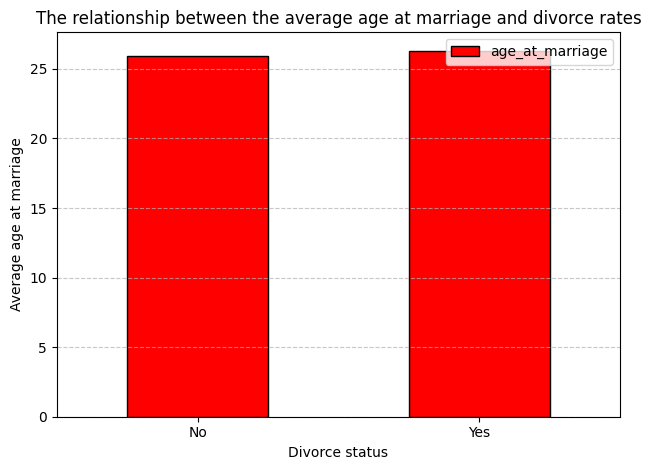

In [586]:
df1.plot(kind='bar', color='red', edgecolor='black')
plt.title('The relationship between the average age at marriage and divorce rates')
plt.xlabel('Divorce status')
plt.ylabel('Average age at marriage')
plt.grid(axis='y' , linestyle='--' , alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<span style="color: skyblue; font-size: 20px;">"From this relationship, we observed that there is no clear effect between the age at marriage and divorce status. Let us now study another relationship."</span>
<div style="background: linear-gradient(to right,rgb(3, 12, 14),rgb(227, 55, 106)); height: 5px; border: none;"></div>

# <span style="color: orange; font-size: 30px;">The relationship between marriage type and divorce ✅</span>


In [587]:
df.head()

,unique_id,marriage_duration_(years),age_at_marriage,marriage_type,education_level,income_level_(inr_per_month),caste/religion,urban/rural,family_involvement,children,divorce_status
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes


In [588]:

df['divorced']=df['divorce_status'][df['divorce_status']== 'Yes']
df['not_divorced']=df['divorce_status'][df['divorce_status']== 'No']

df.head()

,unique_id,marriage_duration_(years),age_at_marriage,marriage_type,education_level,income_level_(inr_per_month),caste/religion,urban/rural,family_involvement,children,divorce_status,divorced,not_divorced
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No,NaN,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes,Yes,NaN
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes,Yes,NaN
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes,Yes,NaN
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes,Yes,NaN


In [589]:
df2=df.groupby('marriage_type')['divorced'].count().to_frame()
df2


,divorced
marriage_type,
Arranged,199
Love,175


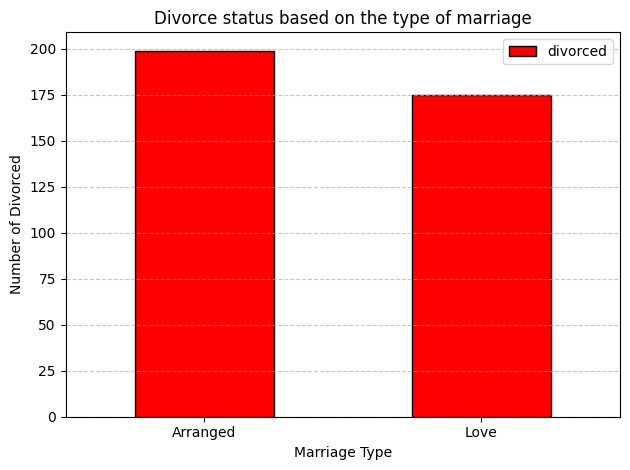

In [590]:
df2.plot(kind='bar', color='red', edgecolor='black')
plt.title('Divorce status based on the type of marriage')
plt.xlabel('Marriage Type')
plt.ylabel('Number of Divorced')
plt.grid(axis='y' , linestyle='--' , alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [591]:
df3=df.groupby('marriage_type')['not_divorced'].count().to_frame()
df3

,not_divorced
marriage_type,
Arranged,427
Love,399


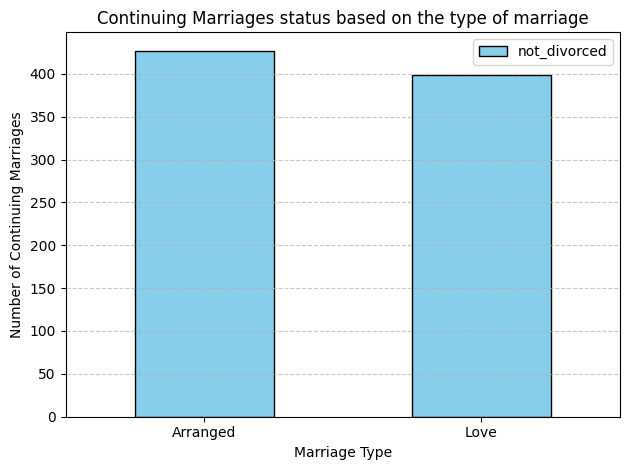

In [592]:
df3.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Continuing Marriages status based on the type of marriage')
plt.xlabel('Marriage Type')
plt.ylabel('Number of Continuing Marriages')
plt.grid(axis='y' , linestyle='--' , alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<span style="color: skyblue; font-size: 20px;">"After studying these results, we can clearly see that there is no significant effect between the type of marriage and whether it leads to divorce or continues without divorce. Let us proceed to analyze another factor, as divorce in India seems to be complex based on these relationships. Let us continue with the analysis."</span>
<div style="background: linear-gradient(to right,rgb(3, 12, 14),rgb(227, 55, 106)); height: 5px; border: none;"></div>

# <span style="color: orange; font-size: 30px;">The relationship between education level and divorce ✅</span>


In [593]:
df.head()

,unique_id,marriage_duration_(years),age_at_marriage,marriage_type,education_level,income_level_(inr_per_month),caste/religion,urban/rural,family_involvement,children,divorce_status,divorced,not_divorced
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No,NaN,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes,Yes,NaN
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes,Yes,NaN
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes,Yes,NaN
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes,Yes,NaN


In [594]:
df['education_level'].unique()

array(['Secondary', 'No Education', 'Postgraduate', 'Graduate', 'Primary'],
      dtype=object)

In [595]:
df4=df.groupby('education_level')['divorced'].count().to_frame().sort_values('divorced',ascending=False)
df4

,divorced
education_level,
Primary,79
Postgraduate,75
No Education,75
Secondary,73
Graduate,72


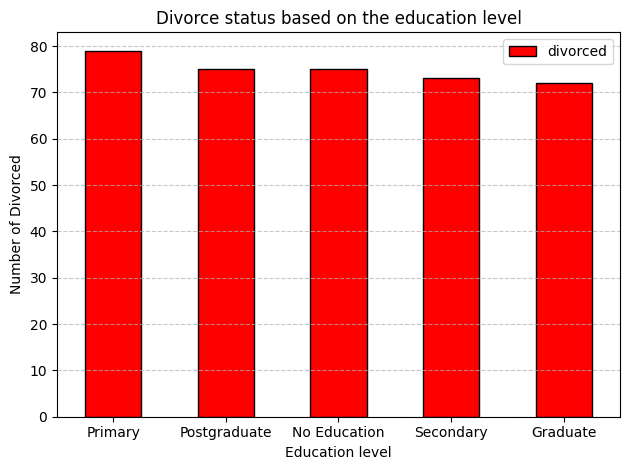

In [596]:
df4.plot(kind='bar', color='red', edgecolor='black')
plt.title('Divorce status based on the education level')
plt.xlabel('Education level')
plt.ylabel('Number of Divorced')
plt.grid(axis='y' , linestyle='--' , alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [597]:
df5=df.groupby('education_level')['not_divorced'].count().to_frame().sort_values('not_divorced',ascending=False)
df5

,not_divorced
education_level,
Secondary,180
Postgraduate,173
No Education,172
Graduate,152
Primary,149


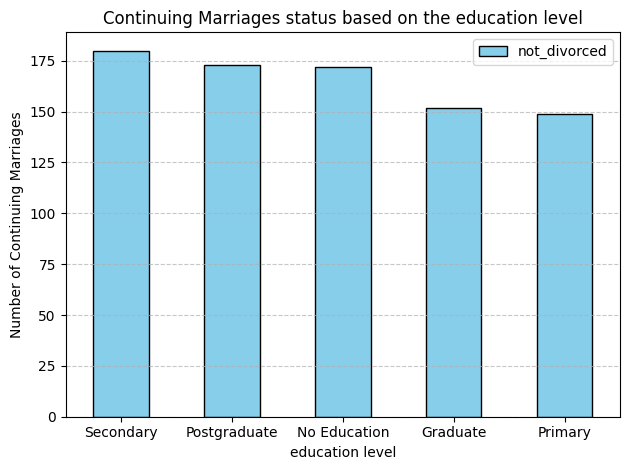

In [598]:
df5.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Continuing Marriages status based on the education level')
plt.xlabel('education level')
plt.ylabel('Number of Continuing Marriages')
plt.grid(axis='y' , linestyle='--' , alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<span style="color: skyblue; font-size: 20px;">the values are relatively close. However, one key observation stands out: the majority of divorces occur among individuals with a primary education level.</span>
<div style="background: linear-gradient(to right,rgb(3, 12, 14),rgb(227, 55, 106)); height: 5px; border: none;"></div>

# <span style="color: orange; font-size: 30px;">The relationship between income level and divorce ✅</span>


In [599]:
df.head()

,unique_id,marriage_duration_(years),age_at_marriage,marriage_type,education_level,income_level_(inr_per_month),caste/religion,urban/rural,family_involvement,children,divorce_status,divorced,not_divorced
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No,NaN,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes,Yes,NaN
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes,Yes,NaN
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes,Yes,NaN
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes,Yes,NaN


In [600]:
df6 = df.groupby('divorce_status')['income_level_(inr_per_month)'].mean().to_frame()
df6

,income_level_(inr_per_month)
divorce_status,
No,101297.70
Yes,104684.37


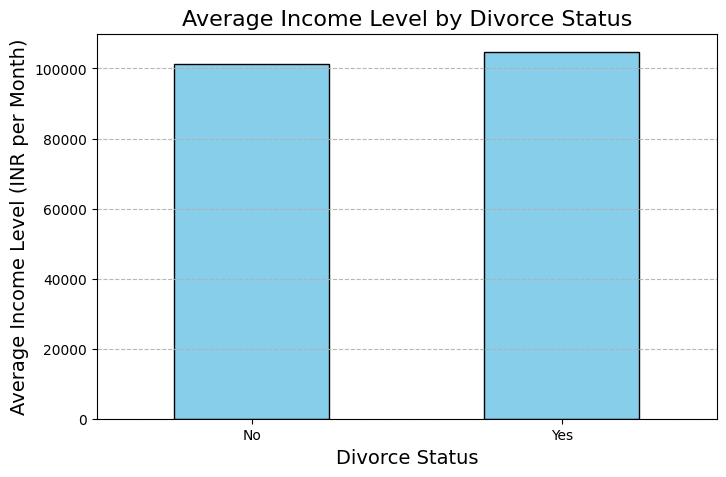

In [601]:

df6.plot(kind='bar', figsize=(8, 5), color='skyblue', edgecolor='black', legend=False)
plt.title('Average Income Level by Divorce Status', fontsize=16)
plt.xlabel('Divorce Status', fontsize=14)
plt.ylabel('Average Income Level (INR per Month)', fontsize=14)
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()


<span style="color: skyblue; font-size: 20px;">"We observed that the average income of divorced individuals and those who remain married is quite close. However, the average income for divorced individuals is slightly higher. This complicates the analysis, as there doesn’t seem to be a clear relationship between income level and the likelihood of divorce.</span>
<div style="background: linear-gradient(to right,rgb(3, 12, 14),rgb(227, 55, 106)); height: 5px; border: none;"></div>

# <span style="color: orange; font-size: 30px;">The relationship between religion and divorce ✅</span>


In [602]:
df.head()

,unique_id,marriage_duration_(years),age_at_marriage,marriage_type,education_level,income_level_(inr_per_month),caste/religion,urban/rural,family_involvement,children,divorce_status,divorced,not_divorced
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No,NaN,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes,Yes,NaN
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes,Yes,NaN
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes,Yes,NaN
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes,Yes,NaN


In [603]:
df['caste/religion'].unique()

array(['Hindu', 'Jain', 'Muslim', 'Christian', 'Other', 'Sikh'],
      dtype=object)

In [604]:
df7=df.groupby('caste/religion')['divorced'].count().to_frame().sort_values('divorced' , ascending=False)
df7

,divorced
caste/religion,
Muslim,70
Jain,67
Sikh,65
Hindu,65
Christian,55
Other,52


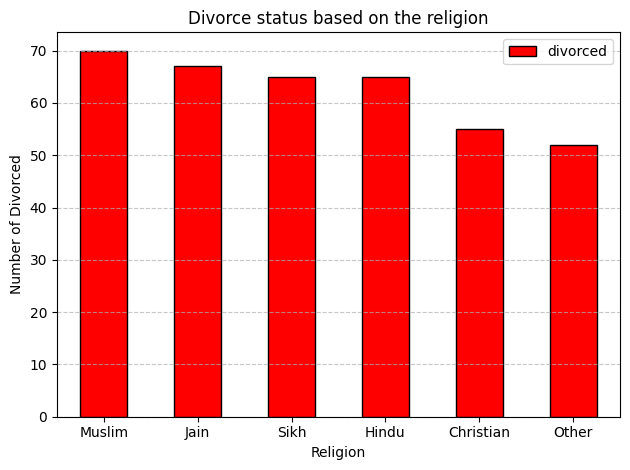

In [605]:
df7.plot(kind='bar' , color='red' , edgecolor='black')
plt.title('Divorce status based on the religion')
plt.xlabel('Religion')
plt.ylabel('Number of Divorced')
plt.grid(axis='y' ,linestyle='--' ,alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [606]:
average_divorce_for_muslim=(70 /df['caste/religion'][df['caste/religion'] == 'Muslim'].count()) * 100 
average_divorce_for_muslim


np.float64(29.535864978902953)

In [607]:
average_divorce_for_jain=(67 / df['caste/religion'][df['caste/religion'] == 'Jain'].count()) * 100
average_divorce_for_jain

np.float64(32.057416267942585)

In [608]:
average_divorce_for_sikh=(65 / df['caste/religion'][df['caste/religion'] == 'Sikh'].count()) * 100
average_divorce_for_sikh

np.float64(38.69047619047619)

In [609]:
average_divorce_for_hindu=(65 / df['caste/religion'][df['caste/religion'] == 'Hindu'].count()) * 100
average_divorce_for_hindu

np.float64(32.17821782178218)

In [610]:
average_divorce_for_christian=(55 / df['caste/religion'][df['caste/religion'] == 'Christian'].count()) * 100
average_divorce_for_christian

np.float64(28.947368421052634)

In [611]:
average_divorce_for_other=(52 / df['caste/religion'][df['caste/religion'] == 'Other'].count()) * 100
average_divorce_for_other

np.float64(26.804123711340207)

<span style="color: skyblue; font-size: 20px;">In our sample data, we observed that there are 70 cases of divorce among Muslim individuals. However, this does not mean that Muslims have the highest divorce rate in India.
When we calculate the divorce rate within each religion separately, we find that Sikhs have the highest percentage of divorce at 39%, while the divorce rate among Muslims is 30%. This highlights that while the total number of divorces may be higher for certain groups, the percentage relative to the population within each religion tells a different story.</span>
<div style="background: linear-gradient(to right,rgb(3, 12, 14),rgb(227, 55, 106)); height: 5px; border: none;"></div>

# <span style="color: orange; font-size: 30px;">The Relationship Between Urban/Rural Living and Divorce ✅</span>


In [612]:
df.head()

,unique_id,marriage_duration_(years),age_at_marriage,marriage_type,education_level,income_level_(inr_per_month),caste/religion,urban/rural,family_involvement,children,divorce_status,divorced,not_divorced
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No,NaN,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes,Yes,NaN
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes,Yes,NaN
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes,Yes,NaN
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes,Yes,NaN


In [613]:
df['urban/rural'].unique()

array(['Rural', 'Urban'], dtype=object)

In [614]:
df['urban/rural'][df['urban/rural']== 'Urban'].count()

np.int64(602)

In [615]:
df['urban/rural'][df['urban/rural']== 'Rural'].count()

np.int64(598)

In [616]:
df8=df.groupby('urban/rural')['divorced'].count().to_frame().sort_values('divorced' , ascending=False)
df8

,divorced
urban/rural,
Urban,194
Rural,180


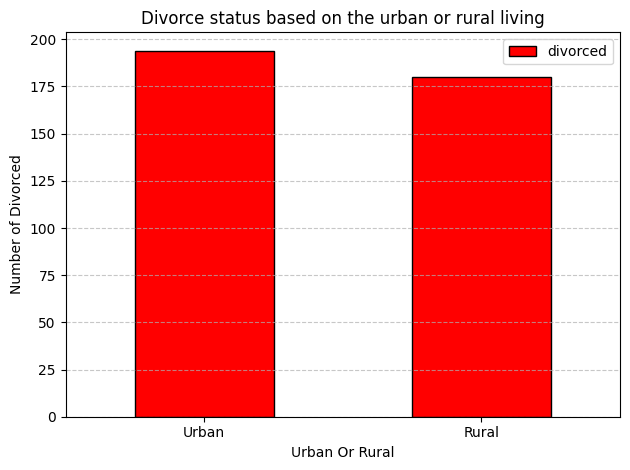

In [617]:
df8.plot(kind='bar' , color='red' , edgecolor='black')
plt.title('Divorce status based on the urban or rural living')
plt.xlabel('Urban Or Rural')
plt.ylabel('Number of Divorced')
plt.grid(axis='y' ,linestyle='--' ,alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<span style="color: skyblue; font-size: 20px;">The average divorce rate among people living in urban areas is higher than that of those in rural areas , This result raises many questions about the differences in mindset, lifestyles, and cultural norms and traditions between urban and rural communities.</span>
<div style="background: linear-gradient(to right,rgb(3, 12, 14),rgb(227, 55, 106)); height: 100px; border: none;"></div>